<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/10_PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/seeds_dataset.txt', sep='\s+', header=None)

# 데이터 확인
print(df.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


In [4]:
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
df.columns=['area','perimeter','compactness','length_of_kernel','width_of_kernel','asymmetry_coefficient','length_of_kernel_groove','class']

In [6]:
df

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [12]:
df.isna().sum()

,0
area,0
perimeter,0
compactness,0
length_of_kernel,0
width_of_kernel,0
asymmetry_coefficient,0
length_of_kernel_groove,0
class,0


In [7]:
x=df.drop('class',axis=1)
y=df['class']

In [13]:
df['class'].value_counts()

,count
class,
1,70
2,70
3,70


In [15]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((168, 7), (42, 7), (168,), (42,))

In [18]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss=StandardScaler()
x_train_s=ss.fit_transform(x_train)
x_test_s=ss.fit_transform(x_test)

In [24]:
x_train, x_test

(      area  perimeter  compactness  length_of_kernel  width_of_kernel  \
 150  11.83      13.23       0.8496             5.263            2.840   
 96   19.31      16.59       0.8815             6.341            3.810   
 200  12.38      13.44       0.8609             5.219            2.989   
 68   14.37      14.39       0.8726             5.569            3.153   
 156  11.34      12.87       0.8596             5.053            2.849   
 ..     ...        ...          ...               ...              ...   
 106  18.85      16.17       0.9056             6.152            3.806   
 14   13.74      14.05       0.8744             5.482            3.114   
 92   18.81      16.29       0.8906             6.272            3.693   
 179  12.21      13.47       0.8453             5.357            2.893   
 102  19.46      16.50       0.8985             6.113            3.892   
 
      asymmetry_coefficient  length_of_kernel_groove  
 150                  5.195                    5.307  


In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_s,y_train)

KNeighborsClassifier()

In [26]:
clf.score(x_train_s,y_train)

0.9523809523809523

In [28]:
y_pred=clf.predict(x_test_s)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


acc: 0.8809523809523809
re: 0.8805704099821746
pre: 0.875
f1: 0.8770311813790075


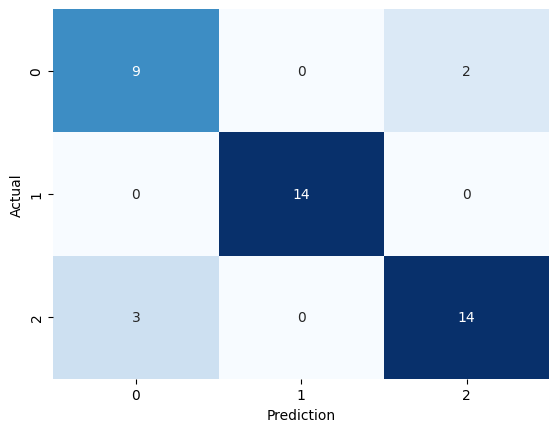

In [32]:
print_metrics(y_test,y_pred)

# pca 적용


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
x_train.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307
96,19.31,16.59,0.8815,6.341,3.810,3.477,6.238
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045
68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300
156,11.34,12.87,0.8596,5.053,2.849,3.347,5.003


In [35]:
from sklearn.decomposition import PCA


In [48]:
pca=PCA(n_components=3, random_state=42)#몇 개로 줄일것인가?
x_train_p=pca.fit_transform(x_train)
x_test_p=pca.fit_transform(x_test)

In [37]:
x_train_p

array([[-3.53515028e+00,  1.11779438e+00,  2.17890702e-01],
       [ 4.99201463e+00,  4.56245653e-01,  1.47092775e-01],
       [-3.02269199e+00,  1.43301590e+00, -1.54330135e-01],
       [-2.87587773e-01, -2.24946598e+00,  1.57373590e-01],
       [-3.94357373e+00, -8.12204241e-01,  5.93518412e-02],
       [ 4.65634456e+00, -1.43279034e+00,  1.13759014e-01],
       [ 1.61297019e+00,  7.54079940e-01, -1.50037938e-01],
       [-3.53107434e-02, -5.66335882e-01, -4.01442651e-02],
       [ 3.83925456e-01, -1.86088983e+00, -1.04872266e-01],
       [-3.79998520e+00,  1.08469141e+00,  2.31086187e-02],
       [ 4.82603591e+00,  3.59686207e-02,  9.81344127e-02],
       [-1.55000686e+00, -3.34923693e-01, -2.19915320e-03],
       [-2.50758515e+00,  1.07188606e-01, -2.26390111e-01],
       [ 4.85597912e-01, -1.41808052e-02, -2.13715671e-01],
       [ 1.53481276e+00,  3.21043463e-01,  2.20631856e-01],
       [-3.10386528e-01, -2.41386388e+00,  6.65825697e-02],
       [-2.21637874e+00, -1.64204366e+00

In [39]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [40]:
y_train=y_train.to_numpy()

In [42]:
from sklearn.ensemble import RandomForestClassifier


In [46]:
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train_p,y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred=clf.predict(x_test_p)

acc: 0.9047619047619048
re: 0.9108734402852049
pre: 0.9008547008547009
f1: 0.9027777777777778


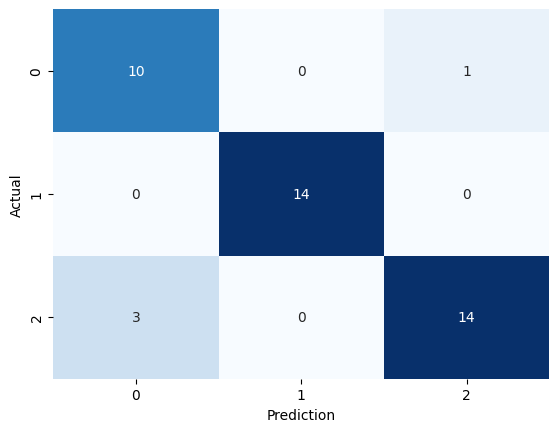

In [52]:
print_metrics(y_test,y_pred)